Pair Problem

Explore a practice dataset by implementing a linear regression in five steps:

1) Plot each independent variable against the dependent variable and take note of any obvious relationships.

2) Break the data into a training set and a test set.

3) Build a few regression models using the training set. Each model is choosing what variables to include and doing this: model = sm.OLS(y_train, X_train) results = model.fit()

4) According to these models what can you say about the sign and certainty of the relationships between the variables in the data? Do the independent variables have a linear relationship with the dependent variable?

5) Apply the results of each of these regression models to predict the values the dependent variable should take on in the test sample. Compare the models using the adjusted R2 - which model performs the best in the test sample?

In [3]:
import pandas as pd

In [183]:
data = pd.read_csv('Practice_data.csv')
  

In [196]:
everything = pd.read_csv('Practice_data.csv')  
print everything.head()
everything[~"Dep_Variable"]

   Ind_Variable_1  Ind_Variable_2  Ind_Variable_3  Ind_Variable_4  \
0       -0.662927        0.481136        0.247215        1.958167   
1        1.582828        0.306494        1.548229       -0.707931   
2       -0.559416        0.022729        1.553344        0.147306   
3       -1.741017        0.366741        0.474254        0.111505   
4        0.139236        0.244032        1.335525       -1.731315   

   Ind_Variable_5  Ind_Variable_6  Dep_Variable  
0        4.470671        0.036799      4.945552  
1        1.871754        0.011579     -1.196168  
2       -3.719343        0.213217     -1.244103  
3        5.226183        0.327708     -2.516572  
4        0.091636        0.516423    -12.755672  


TypeError: bad operand type for unary ~: 'str'

In [190]:
everything[everything[1]]

KeyError: 1

In [5]:
data.describe()

,Ind_Variable_1,Ind_Variable_2,Ind_Variable_3,Ind_Variable_4,Ind_Variable_5,Ind_Variable_6,Dep_Variable
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.033537,0.490905,1.015122,-0.000730,-0.034036,0.502679,-1.987714
std,1.004323,0.289239,1.143070,0.974491,2.905485,0.291490,5.451692
min,-3.797333,0.000137,-0.999359,-3.669716,-10.724628,0.000058,-81.191450
25%,-0.641363,0.243551,0.045748,-0.655812,-2.072929,0.248387,-2.933225
50%,0.027063,0.483979,1.042509,0.002222,0.026972,0.502329,-1.120595
75%,0.695891,0.746508,1.997709,0.643644,1.892338,0.761088,0.348834
max,3.417142,0.999542,2.999183,3.109923,9.516709,0.999821,23.855521


In [8]:
data.head()

,Ind_Variable_1,Ind_Variable_2,Ind_Variable_3,Ind_Variable_4,Ind_Variable_5,Ind_Variable_6,Dep_Variable
0,-0.662927,0.481136,0.247215,1.958167,4.470671,0.036799,4.945552
1,1.582828,0.306494,1.548229,-0.707931,1.871754,0.011579,-1.196168
2,-0.559416,0.022729,1.553344,0.147306,-3.719343,0.213217,-1.244103
3,-1.741017,0.366741,0.474254,0.111505,5.226183,0.327708,-2.516572
4,0.139236,0.244032,1.335525,-1.731315,0.091636,0.516423,-12.755672


In [7]:
data.columns

Index([u'Ind_Variable_1', u'Ind_Variable_2', u'Ind_Variable_3',
       u'Ind_Variable_4', u'Ind_Variable_5', u'Ind_Variable_6',
       u'Dep_Variable'],
      dtype='object')

In [6]:
y = data["Dep_Variable"]

# 1) Plot each independent variable against the dependent variable and take note of any obvious relationships.

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

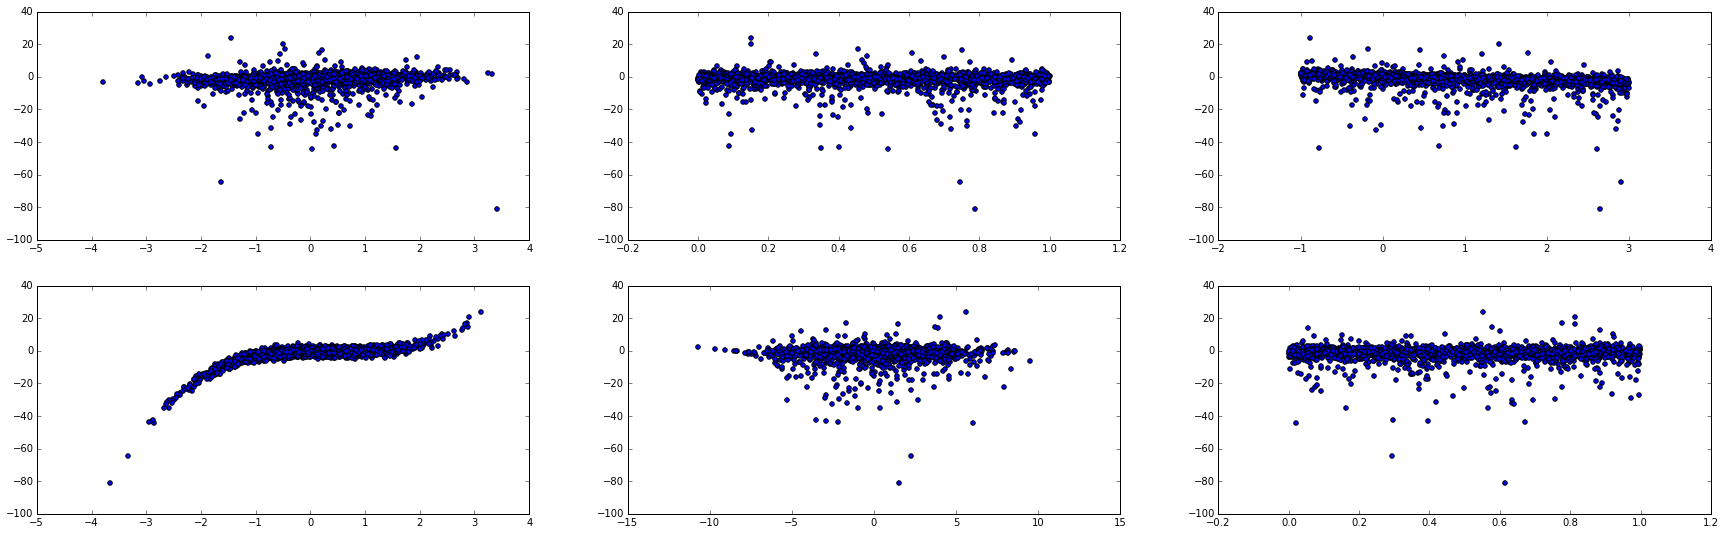

In [25]:
plt.figure(figsize = (30,9))

count = 1
for i in data.columns[:-1]:
    plt.subplot(2,3,count)
    plt.scatter(data[i],data["Dep_Variable"])
    count += 1

In [31]:
X = data[data.columns[:-1]]

# Breaking up our independent variables

In [163]:
a = np.array(data["Ind_Variable_1"])
b = np.array(data["Ind_Variable_2"])
c = np.array(data["Ind_Variable_3"])
d = np.array(data["Ind_Variable_4"])
e = np.array(data["Ind_Variable_5"])
f = np.array(data["Ind_Variable_6"])

list_of_variables = ["a","b","c","d","e","f"]

dict_of_variables = {"a":a,"b":b,"c":c,"d":d,"e":e,"f":f}
    
n = len(f)
ones = np.ones(n)

# Create some models

In [176]:
# Creating Model 1
X1 = pd.DataFrame()
X1["ones"] = ones
X1["d"] = d
X1["d squared"] = d ** 2
X1["d cubed"] = d ** 3

In [177]:
X_ultimate = pd.DataFrame()
X_ultimate["ones"] = ones
#v = list[a,b,c,d,e,f]
#print v.head()

for variable in list_of_variables:
    X_ultimate[variable] = dict_of_variables[variable]
    X_ultimate[variable + " squared"] = dict_of_variables[variable] ** 2
    X_ultimate[variable + " cubed"] = dict_of_variables[variable] ** 3


In [178]:
X_ultimate.head()

,ones,a,a squared,a cubed,b,b squared,b cubed,c,c squared,c cubed,d,d squared,d cubed,e,e squared,e cubed,f,f squared,f cubed
0,1,-0.662927,0.439472,-0.291337,0.481136,0.231492,0.111379,0.247215,0.061115,0.015109,1.958167,3.834417,7.508427,4.470671,19.986902,89.354867,0.036799,0.001354,0.000050
1,1,1.582828,2.505346,3.965532,0.306494,0.093939,0.028792,1.548229,2.397014,3.711128,-0.707931,0.501167,-0.354792,1.871754,3.503463,6.557621,0.011579,0.000134,0.000002
2,1,-0.559416,0.312946,-0.175067,0.022729,0.000517,0.000012,1.553344,2.412876,3.748026,0.147306,0.021699,0.003196,-3.719343,13.833516,-51.451598,0.213217,0.045461,0.009693
3,1,-1.741017,3.031140,-5.277267,0.366741,0.134499,0.049326,0.474254,0.224917,0.106668,0.111505,0.012433,0.001386,5.226183,27.312991,142.742692,0.327708,0.107392,0.035193
4,1,0.139236,0.019387,0.002699,0.244032,0.059552,0.014533,1.335525,1.783626,2.382077,-1.731315,2.997450,-5.189530,0.091636,0.008397,0.000769,0.516423,0.266693,0.137726


In [179]:
# Creating Model 2 - Reduced
X_distilled = pd.DataFrame()
X_distilled["ones"] = ones
X_distilled["a"] = a
X_distilled["c"] = c
X_distilled["d"] = d
X_distilled["d squared"] = d ** 2
X_distilled["d cubed"] = d ** 3

In [138]:
# Creating Model 2
X2 = pd.DataFrame()
X2["ones"] = ones
X2["d cubed"] = d ** 3

In [131]:
print X2.head()

   ones         d   d cubed
0     1  1.958167  7.508427
1     1 -0.707931 -0.354792
2     1  0.147306  0.003196
3     1  0.111505  0.001386
4     1 -1.731315 -5.189530


In [ ]:
# Creating Model 2
X2 = pd.DataFrame()
X2["ones"] = ones
X2["a"] = a
X2["a"] = a
X2["a"] = a
X2["a"] = a
X2["a"] = a

X2["d squared"] = d ** 2
X2["d cubed"] = d ** 3

In [128]:
print X.head()

   ones         d  d squared   d cubed
0     1  1.958167   3.834417  7.508427
1     1 -0.707931   0.501167 -0.354792
2     1  0.147306   0.021699  0.003196
3     1  0.111505   0.012433  0.001386
4     1 -1.731315   2.997450 -5.189530


# 2) Break the data into a training set and a test set.

In [120]:
from sklearn import cross_validation

In [170]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_ultimate, y, test_size=0.4, random_state=0)

In [171]:
# print X.shape
# print X_test.shape
# print X_train.shape
# print " "
# print y.shape
# print y_test.shape
# print y_train.shape

In [172]:
X_train.head()

,ones,a,a squared,a cubed,b,b squared,b cubed,c,c squared,c cubed,d,d squared,d cubed,e,e squared,e cubed,f,f squared,f cubed
891,1,0.455742,0.207701,0.094658,0.356816,0.127318,0.045429,-0.714866,0.511034,-0.365321,1.630473,2.658443,4.334520,7.370726,54.327602,400.433871,0.772021,0.596016,0.460137
1796,1,1.589775,2.527384,4.017970,0.347499,0.120755,0.041962,-0.760616,0.578537,-0.440045,-1.103184,1.217014,-1.342590,0.635951,0.404433,0.257200,0.903997,0.817210,0.738756
1868,1,-0.750141,0.562711,-0.422112,0.397081,0.157673,0.062609,0.081092,0.006576,0.000533,0.518403,0.268742,0.139317,-0.840665,0.706717,-0.594112,0.757638,0.574015,0.434896
1042,1,1.442307,2.080250,3.000360,0.648759,0.420889,0.273056,-0.992773,0.985598,-0.978474,0.149649,0.022395,0.003351,1.826313,3.335419,6.091518,0.943689,0.890550,0.840402
996,1,0.875566,0.766615,0.671222,0.702449,0.493435,0.346613,1.218092,1.483748,1.807341,-1.095781,1.200736,-1.315743,1.881922,3.541630,6.665072,0.859864,0.739366,0.635754


# 3) Build a few regression models using the training set. Each model is choosing what variables to include and doing this: model = sm.OLS(y_train, X_train) results = model.fit()

In [173]:
import statsmodels.api as sm

In [174]:
model = sm.OLS(y_train,X_train)

In [175]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Dep_Variable   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     2197.
Date:                Mon, 18 Apr 2016   Prob (F-statistic):               0.00
Time:                        10:27:24   Log-Likelihood:                -1687.8
No. Observations:                1200   AIC:                             3414.
Df Residuals:                    1181   BIC:                             3510.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
ones           0.9670      0.167      5.799      0.000         0.640     1.294
a              0.5469      0.047     11.645      0.000         0.455     0.639
a squared     -0.0064      0.022     -0.296      0.768        -0.049     0.036
a cubed        0.0085      0.013      0.654      0.513        -0.017     0.034
b              0.0454      0.985      0.046      0.963        -1.886     1.977
b squared     -2.6048      2.306     -1.130      0.259        -7.129     1.919
b cubed        1.7538      1.527      1.148      0.251        -1.243     4.750
c             -1.0616      0.056    -18.827      0.000        -1.172    -0.951
c squared     -0.0523      0.076     -0.689      0.491        -0.201     0.097
c cubed        0.0097      0.024      0.404      0.686        -0.038     0.057
d              0.2265      0.046      4.896      0.000         0.136     0.317
d squared     -1.5127      0.021    -72.738      0.000        -1.553    -1.472
d cubed        1.2117      0.012    101.547      0.000         1.188     1.235
e              0.0232      0.016      1.464      0.143        -0.008     0.054
e squared      0.0015      0.002      0.617      0.537        -0.003     0.006
e cubed       -0.0007      0.000     -1.548      0.122        -0.002     0.000
f              0.3793      1.000      0.379      0.705        -1.583     2.341
f squared     -1.3716      2.339     -0.587      0.558        -5.960     3.217
f cubed        1.1760      1.541      0.763      0.446        -1.848     4.200
==============================================================================
Omnibus:                        0.325   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.850   Jarque-Bera (JB):                0.243
Skew:                           0.024   Prob(JB):                        0.886
Kurtosis:                       3.051   Cond. No.                     9.94e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [180]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_distilled, y, test_size=0.4, random_state=0)
#X_train.head()

model = sm.OLS(y_train,X_train)

results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Dep_Variable   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     7327.
Date:                Mon, 18 Apr 2016   Prob (F-statistic):               0.00
Time:                        10:31:47   Log-Likelihood:                -1738.6
No. Observations:                1200   AIC:                             3489.
Df Residuals:                    1194   BIC:                             3520.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
ones           0.5735      0.045     12.712      0.000         0.485     0.662
a              0.5674      0.030     19.109      0.000         0.509     0.626
c             -1.0999      0.026    -42.242      0.000        -1.151    -1.049
d              0.2189      0.048      4.586      0.000         0.125     0.313
d squared     -1.5231      0.021    -70.942      0.000        -1.565    -1.481
d cubed        1.2150      0.012     99.527      0.000         1.191     1.239
==============================================================================
Omnibus:                        0.743   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.690   Jarque-Bera (JB):                0.731
Skew:                           0.060   Prob(JB):                        0.694
Kurtosis:                       2.996   Cond. No.                         6.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 4) According to these models what can you say about the sign and certainty of the relationships between the variables in the data? Do the independent variables have a linear relationship with the dependent variable?

# 5) Apply the results of each of these regression models to predict the values the dependent variable should take on in the test sample. Compare the models using the adjusted R2 - which model performs the best in the test sample?

In [197]:
blah = model.predict(X_test,y_test)